# Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods (Week 2)

## 1. Description of the problem and a discussion of the background:

<div style="text-align: justify"> As a consultant of restaurant investors, it is required to me provide recommendations to launch a new restaurant and the type of that restaurant in the city of Miami in the United States. </div>

<div style="text-align: justify"> According to Wikipedia, Miami is the cultural, economic and financial center of South Florida. It is the sixth most densely populated major city in the United States. The Miami metropolitan area is home to 6.1 million people, the seventh-largest in the nation. Moreover, Miami is a major center and leader in finance, commerce, culture, arts, and international trade and the city was ranked as the third-richest in the United States and the eighth-richest in the world in terms of purchasing power (2018 UBS study). </div>

<div style="text-align: justify"> Based on this information it would be recommended to invest in a gourmet restaurant or haute cuisine. The potential clients would be clients with age range over 35, couples with high income and executives in business meetings, medium-high ticket, high service expectations, planned and booked in advance, prefer accessible and comfortable places. They are willing to travel if necessary.  </div>

<div style="text-align: justify"> Once you have decided what type of business you will create and who your target customer is, you must choose a location that is easily accessible to your customers. Who they are, what areas they move through, and which locations are populated (and active) enough to support your business will help you choose the right location.</div>


## 2. Description of the data and how it will be used to solve the problem:


<div style="text-align: justify"> One way to start evaluating possible locations that are accessible can be to segment the city based on the most common venue category in each neighborhood, and then, group these neighborhoods into clusters. </div>
<div style="text-align: justify">  Our decision will be influenced by the numbers of restaurants in each neighborhood, density population, the location of the most influential central business districts or the presence of major business offices as well as national and international banks, Hotels, courthouses, financial headquarters, cultural and tourist attractions. Our premise will be the closer your business is to where the consumers who make up your target audience live, frequent or transit, the greater the chance that they will visit you.</div>
<div style="text-align: justify"> To achieve our objectives, I will use Foursquare API in order to get the most common venues, location and type of business of every neighborhood. Some public information will be used to obtain data related to social and economic conditions of clients and demographics. </div>


## 3. Methodology:

<h3>3.1 Download all the dependencies that we will need</h3>

First of all, we need to download all the libraies necesary to analize and visualize our data.

In [414]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<h3>3.2 Download and Explore the dataset</h3>

In [415]:
df1 = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami', header = 0)


In [416]:
df1

[                     Neighborhood          Demonym            Population2010  \
 0                      Allapattah              NaN                     54289   
 1   Arts & Entertainment District              NaN                     11033   
 2                        Brickell      Brickellite                     31759   
 3                     Buena Vista              NaN                      9058   
 4                   Coconut Grove          Grovite                     20076   
 5                       Coral Way              NaN                     35062   
 6                 Design District              NaN                      3573   
 7                        Downtown       Downtowner  71,000 (13,635 CBD only)   
 8                       Edgewater              NaN                     15005   
 9                         Flagami              NaN                     50834   
 10              Grapeland Heights              NaN                     14004   
 11                Health Di

In [417]:
print(type(df1))

<class 'list'>


Our dataframe is actually "a List". I am going to convert it as follows

In [418]:
df = pd.concat(df1, sort=False)
df

,Neighborhood,Demonym,Population2010,Population/Km²,Sub-neighborhoods,Coordinates,vteNeighborhoods in Miami,Unnamed: 1,vteMiami articles,Unnamed: 2
0,Allapattah,NaN,54289,4401,NaN,25.815-80.224,NaN,NaN,NaN,NaN
1,Arts & Entertainment District,NaN,11033,7948,NaN,25.799-80.190,NaN,NaN,NaN,NaN
2,Brickell,Brickellite,31759,14541,West Brickell,25.758-80.193,NaN,NaN,NaN,NaN
3,Buena Vista,NaN,9058,3540,Buena Vista East Historic District and Design ...,25.813-80.192,NaN,NaN,NaN,NaN
4,Coconut Grove,Grovite,20076,3091,"Center Grove, Northeast Coconut Grove, Southwe...",25.712-80.257,NaN,NaN,NaN,NaN
5,Coral Way,NaN,35062,4496,"Coral Gate, Golden Pines, Shenandoah, Historic...",25.750-80.283,NaN,NaN,NaN,NaN
6,Design District,NaN,3573,3623,NaN,25.813-80.193,NaN,NaN,NaN,NaN
7,Downtown,Downtowner,"71,000 (13,635 CBD only)",10613,"Brickell, Central Business District (CBD), Dow...",25.774-80.193,NaN,NaN,NaN,NaN
8,Edgewater,NaN,15005,6675,NaN,25.802-80.190,NaN,NaN,NaN,NaN
9,Flagami,NaN,50834,5665,"Alameda, Grapeland Heights, and Fairlawn",25.762-80.316,NaN,NaN,NaN,NaN


In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 6
Data columns (total 10 columns):
Neighborhood                 26 non-null object
Demonym                      8 non-null object
Population2010               25 non-null object
Population/Km²               25 non-null object
Sub-neighborhoods            13 non-null object
Coordinates                  24 non-null object
vteNeighborhoods in Miami    1 non-null object
Unnamed: 1                   7 non-null object
vteMiami articles            7 non-null object
Unnamed: 2                   0 non-null float64
dtypes: float64(1), object(9)
memory usage: 2.9+ KB


Now the table is a Dataframe Class!

Set the column 'Neighborhood' as our index:

In [420]:
df.set_index('Neighborhood')

,Demonym,Population2010,Population/Km²,Sub-neighborhoods,Coordinates,vteNeighborhoods in Miami,Unnamed: 1,vteMiami articles,Unnamed: 2
Neighborhood,,,,,,,,,
Allapattah,NaN,54289,4401,NaN,25.815-80.224,NaN,NaN,NaN,NaN
Arts & Entertainment District,NaN,11033,7948,NaN,25.799-80.190,NaN,NaN,NaN,NaN
Brickell,Brickellite,31759,14541,West Brickell,25.758-80.193,NaN,NaN,NaN,NaN
Buena Vista,NaN,9058,3540,Buena Vista East Historic District and Design ...,25.813-80.192,NaN,NaN,NaN,NaN
Coconut Grove,Grovite,20076,3091,"Center Grove, Northeast Coconut Grove, Southwe...",25.712-80.257,NaN,NaN,NaN,NaN
Coral Way,NaN,35062,4496,"Coral Gate, Golden Pines, Shenandoah, Historic...",25.750-80.283,NaN,NaN,NaN,NaN
Design District,NaN,3573,3623,NaN,25.813-80.193,NaN,NaN,NaN,NaN
Downtown,Downtowner,"71,000 (13,635 CBD only)",10613,"Brickell, Central Business District (CBD), Dow...",25.774-80.193,NaN,NaN,NaN,NaN
Edgewater,NaN,15005,6675,NaN,25.802-80.190,NaN,NaN,NaN,NaN


In [421]:
df.columns.values

array(['Neighborhood', 'Demonym', 'Population2010', 'Population/Km²',
       'Sub-neighborhoods', 'Coordinates', 'vteNeighborhoods in Miami',
       'Unnamed: 1', 'vteMiami articles', 'Unnamed: 2'], dtype=object)

In [422]:
df.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25,  0,  0,  1,  2,  3,  4,  5,  6],
      dtype=int64)

Now, we are going to delete the unnecesary information from our dataframe

In [423]:
df_miami = df.drop(["Demonym", "Sub-neighborhoods", 'vteNeighborhoods in Miami',
       'Unnamed: 1', 'vteMiami articles', 'Unnamed: 2'], axis=1)
df_miami

,Neighborhood,Population2010,Population/Km²,Coordinates
0,Allapattah,54289,4401,25.815-80.224
1,Arts & Entertainment District,11033,7948,25.799-80.190
2,Brickell,31759,14541,25.758-80.193
3,Buena Vista,9058,3540,25.813-80.192
4,Coconut Grove,20076,3091,25.712-80.257
5,Coral Way,35062,4496,25.750-80.283
6,Design District,3573,3623,25.813-80.193
7,Downtown,"71,000 (13,635 CBD only)",10613,25.774-80.193
8,Edgewater,15005,6675,25.802-80.190
9,Flagami,50834,5665,25.762-80.316


In [424]:
print(df_miami.dtypes)
print(df_miami.columns)

Neighborhood      object
Population2010    object
Population/Km²    object
Coordinates       object
dtype: object
Index(['Neighborhood', 'Population2010', 'Population/Km²', 'Coordinates'], dtype='object')


<H4>Missing and Drop missing values along the column "Coordinates"</H4>

In [425]:
df_miami = df_miami.dropna(subset=["Coordinates"], axis=0)
df_miami = df_miami.dropna(subset=["Population2010"], axis=0)
df_miami = df_miami.dropna(subset=["Population/Km²"], axis=0)


In [426]:
df_miami

,Neighborhood,Population2010,Population/Km²,Coordinates
0,Allapattah,54289,4401,25.815-80.224
1,Arts & Entertainment District,11033,7948,25.799-80.190
2,Brickell,31759,14541,25.758-80.193
3,Buena Vista,9058,3540,25.813-80.192
4,Coconut Grove,20076,3091,25.712-80.257
5,Coral Way,35062,4496,25.750-80.283
6,Design District,3573,3623,25.813-80.193
7,Downtown,"71,000 (13,635 CBD only)",10613,25.774-80.193
8,Edgewater,15005,6675,25.802-80.190
9,Flagami,50834,5665,25.762-80.316


In [427]:
print(df_miami.dtypes)
print(df_miami.columns)

Neighborhood      object
Population2010    object
Population/Km²    object
Coordinates       object
dtype: object
Index(['Neighborhood', 'Population2010', 'Population/Km²', 'Coordinates'], dtype='object')


In [428]:
missing_data = df_miami.isnull()
missing_data.head(24)
#"True" stands for missing value, while "False" stands for not missing value.

,Neighborhood,Population2010,Population/Km²,Coordinates
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [429]:
print(df_miami.dtypes)
print(df_miami.columns)

Neighborhood      object
Population2010    object
Population/Km²    object
Coordinates       object
dtype: object
Index(['Neighborhood', 'Population2010', 'Population/Km²', 'Coordinates'], dtype='object')


In [430]:
df_miami[['Latitude','Coordinates']] = df_miami['Coordinates'].str.split('-',expand=True)
df_miami

,Neighborhood,Population2010,Population/Km²,Coordinates,Latitude
0,Allapattah,54289,4401,80.224,25.815
1,Arts & Entertainment District,11033,7948,80.190,25.799
2,Brickell,31759,14541,80.193,25.758
3,Buena Vista,9058,3540,80.192,25.813
4,Coconut Grove,20076,3091,80.257,25.712
5,Coral Way,35062,4496,80.283,25.750
6,Design District,3573,3623,80.193,25.813
7,Downtown,"71,000 (13,635 CBD only)",10613,80.193,25.774
8,Edgewater,15005,6675,80.190,25.802
9,Flagami,50834,5665,80.316,25.762


In [431]:
df_miami.rename(columns={'Coordinates': 'Longitude'}, inplace=True)
df_miami

,Neighborhood,Population2010,Population/Km²,Longitude,Latitude
0,Allapattah,54289,4401,80.224,25.815
1,Arts & Entertainment District,11033,7948,80.190,25.799
2,Brickell,31759,14541,80.193,25.758
3,Buena Vista,9058,3540,80.192,25.813
4,Coconut Grove,20076,3091,80.257,25.712
5,Coral Way,35062,4496,80.283,25.750
6,Design District,3573,3623,80.193,25.813
7,Downtown,"71,000 (13,635 CBD only)",10613,80.193,25.774
8,Edgewater,15005,6675,80.190,25.802
9,Flagami,50834,5665,80.316,25.762


In [432]:
print(df_miami.dtypes)
print(df_miami.columns)

Neighborhood      object
Population2010    object
Population/Km²    object
Longitude         object
Latitude          object
dtype: object
Index(['Neighborhood', 'Population2010', 'Population/Km²', 'Longitude',
       'Latitude'],
      dtype='object')


In [433]:
df_miami['Population2010'] = df_miami['Population2010'].replace(['-'], '0')

In [434]:
df_miami['Population/Km²'] = df_miami['Population/Km²'].replace(['-'], '0')

In [435]:
df_miami['Population2010'] = df_miami['Population2010'].replace(['71,000 (13,635 CBD only)'], '71000')

In [547]:
df_miami.head()

,Neighborhood,Population2010,Population/Km²,Longitude,Latitude
0,Allapattah,54289,4401,-80.224,25.815
1,Arts & Entertainment District,11033,7948,-80.190,25.799
2,Brickell,31759,14541,-80.193,25.758
3,Buena Vista,9058,3540,-80.192,25.813
4,Coconut Grove,20076,3091,-80.257,25.712


In [437]:
print(df_miami.dtypes)
print(df_miami.columns)

Neighborhood      object
Population2010    object
Population/Km²    object
Longitude         object
Latitude          object
dtype: object
Index(['Neighborhood', 'Population2010', 'Population/Km²', 'Longitude',
       'Latitude'],
      dtype='object')


<h4>Lets list the data types for each column</h4>

In [438]:
print(df_miami.dtypes)
print(df_miami.columns)

Neighborhood      object
Population2010    object
Population/Km²    object
Longitude         object
Latitude          object
dtype: object
Index(['Neighborhood', 'Population2010', 'Population/Km²', 'Longitude',
       'Latitude'],
      dtype='object')


<h4>Convert data types to proper format</h4>

In [439]:
df_miami[['Longitude','Latitude']] = df_miami[["Longitude","Latitude"]].astype("float")
df_miami[['Population2010','Population/Km²']] = df_miami[["Population2010","Population/Km²"]].astype("int")
df_miami

,Neighborhood,Population2010,Population/Km²,Longitude,Latitude
0,Allapattah,54289,4401,80.224,25.815
1,Arts & Entertainment District,11033,7948,80.190,25.799
2,Brickell,31759,14541,80.193,25.758
3,Buena Vista,9058,3540,80.192,25.813
4,Coconut Grove,20076,3091,80.257,25.712
5,Coral Way,35062,4496,80.283,25.750
6,Design District,3573,3623,80.193,25.813
7,Downtown,71000,10613,80.193,25.774
8,Edgewater,15005,6675,80.190,25.802
9,Flagami,50834,5665,80.316,25.762


<h4>Let us list the columns after the conversion</h4>

In [440]:
print(df_miami.dtypes)
print(df_miami.columns)

Neighborhood       object
Population2010      int32
Population/Km²      int32
Longitude         float64
Latitude          float64
dtype: object
Index(['Neighborhood', 'Population2010', 'Population/Km²', 'Longitude',
       'Latitude'],
      dtype='object')


In [441]:
df_miami[['Longitude']] = -1*df_miami[["Longitude"]]

In [442]:
df_miami

,Neighborhood,Population2010,Population/Km²,Longitude,Latitude
0,Allapattah,54289,4401,-80.224,25.815
1,Arts & Entertainment District,11033,7948,-80.190,25.799
2,Brickell,31759,14541,-80.193,25.758
3,Buena Vista,9058,3540,-80.192,25.813
4,Coconut Grove,20076,3091,-80.257,25.712
5,Coral Way,35062,4496,-80.283,25.750
6,Design District,3573,3623,-80.193,25.813
7,Downtown,71000,10613,-80.193,25.774
8,Edgewater,15005,6675,-80.190,25.802
9,Flagami,50834,5665,-80.316,25.762


In [443]:
print(df_miami.dtypes)
print(df_miami.columns)

Neighborhood       object
Population2010      int32
Population/Km²      int32
Longitude         float64
Latitude          float64
dtype: object
Index(['Neighborhood', 'Population2010', 'Population/Km²', 'Longitude',
       'Latitude'],
      dtype='object')


<h4>Now the dataset is ready to use in our project!</h4>

<h3>3.3 Horizontal Bar Chart Population</h3>

Horizontal Bar Plot
In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. As you will see, there is more room on the y-axis to label categetorical variables.

In [444]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.2.3


In [445]:
df_miami2 = df_miami.set_index('Neighborhood')
df_miami2

,Population2010,Population/Km²,Longitude,Latitude
Neighborhood,,,,
Allapattah,54289,4401,-80.224,25.815
Arts & Entertainment District,11033,7948,-80.190,25.799
Brickell,31759,14541,-80.193,25.758
Buena Vista,9058,3540,-80.192,25.813
Coconut Grove,20076,3091,-80.257,25.712
Coral Way,35062,4496,-80.283,25.750
Design District,3573,3623,-80.193,25.813
Downtown,71000,10613,-80.193,25.774
Edgewater,15005,6675,-80.190,25.802


In [446]:
print(df_miami.dtypes)
print(df_miami.columns)

Neighborhood       object
Population2010      int32
Population/Km²      int32
Longitude         float64
Latitude          float64
dtype: object
Index(['Neighborhood', 'Population2010', 'Population/Km²', 'Longitude',
       'Latitude'],
      dtype='object')


In [447]:
df_miami2.index.values

array(['Allapattah', 'Arts & Entertainment District', 'Brickell',
       'Buena Vista', 'Coconut Grove', 'Coral Way', 'Design District',
       'Downtown', 'Edgewater', 'Flagami', 'Grapeland Heights',
       'Liberty City', 'Little Haiti', 'Little Havana', 'Lummus Park',
       'Midtown', 'Overtown', 'Park West', 'The Roads', 'Upper Eastside',
       'Virginia Key', 'West Flagler', 'Wynwood'], dtype=object)

In [448]:
# sort dataframe on 'Population/Km²' column (descending)
df_miami2.sort_values(by='Population/Km²', ascending=True, inplace=True)
df_top10 = df_miami2['Population/Km²'].tail(10)
df_top10

Neighborhood
Allapattah                        4401
West Flagler                      4428
Coral Way                         4496
The Roads                         4899
Flagami                           5665
Edgewater                         6675
Arts & Entertainment District     7948
Little Havana                     8423
Downtown                         10613
Brickell                         14541
Name: Population/Km², dtype: int32

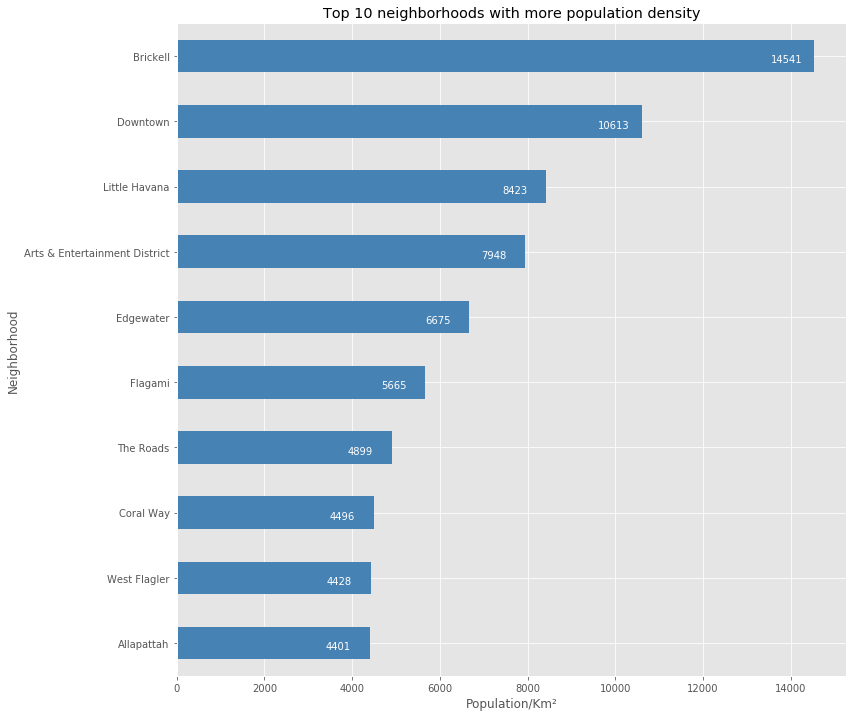

In [449]:
df_top10.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Population/Km²')
plt.title('Top 10 neighborhoods with more population density')
 # annotate value labels to each country
for index, value in enumerate(df_top10): 
    label = format(int(value)) # format int with commas
    # place text at the end of bar (subtracting 1000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 1000, index - 0.10), color='white')
plt.show()

<h4>Use geopy library to get the latitude and longitude values of Miami City.</h4>


In [450]:
address = 'Miami, FL'

geolocator = Nominatim(user_agent="mi_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Miami City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Miami City are 25.7742658, -80.1936589.


In [451]:
print(df_miami.dtypes)
print(df_miami.columns)

Neighborhood       object
Population2010      int32
Population/Km²      int32
Longitude         float64
Latitude          float64
dtype: object
Index(['Neighborhood', 'Population2010', 'Population/Km²', 'Longitude',
       'Latitude'],
      dtype='object')


<h4>Create a map of Miami with neighborhoods superimposed on top.</h4>

In [453]:
# create map of miami using latitude and longitude values
map_miami = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_miami['Latitude'], df_miami['Longitude'], df_miami['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_miami)  
    
map_miami

<h3>3.3 Foursquare API</h3>

<h4>I used Foursquare API to explore the neighborhoods and segment them</h4>

In [454]:
CLIENT_ID = 'HC13U0DD3Z4E0OS3QAJ2C55QRNRI5HSVA3YWO2OG0FOP2CHF' # your Foursquare ID
CLIENT_SECRET =  '0BGTZHDIPVIJHYNGBHKZBYE5I2WW1YEJFHVR4DIQXXCJNMLU' # your Foursquare Secret
VERSION = '20180605'# Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HC13U0DD3Z4E0OS3QAJ2C55QRNRI5HSVA3YWO2OG0FOP2CHF
CLIENT_SECRET:0BGTZHDIPVIJHYNGBHKZBYE5I2WW1YEJFHVR4DIQXXCJNMLU


#### Let's explore Downtown neighborhood in our dataframe.

Get the neighborhood's name.

In [457]:
df_miami.loc[2, 'Neighborhood']

'Brickell'

#### Get the neighborhood's latitude and longitude values.

In [458]:
neighborhood_latitude = df_miami.loc[2, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_miami.loc[2, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_miami.loc[2, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Brickell are 25.758, -80.193.


#### Now, let's get the top 100 venues that are in the Downtown within a radius of 500 meters , It si one of the neighborhood with more population.

#### GET request URL

In [574]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=HC13U0DD3Z4E0OS3QAJ2C55QRNRI5HSVA3YWO2OG0FOP2CHF&client_secret=0BGTZHDIPVIJHYNGBHKZBYE5I2WW1YEJFHVR4DIQXXCJNMLU&v=20180605&ll=25.758,-80.193&radius=500&limit=100'

#### Send the GET request and examine the resutls

In [549]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f0a2236644de62efaa173aa'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Coral Way',
  'headerFullLocation': 'Coral Way, Miami',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 53,
  'suggestedBounds': {'ne': {'lat': 25.762500004500005,
    'lng': -80.18801286352735},
   'sw': {'lat': 25.753499995499993, 'lng': -80.19798713647265}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b069b0ff964a520a6ed22e3',
       'name': 'Four Seasons Hotel Miami',
       'location': {'address': '1435 Brickell Ave',
        'crossStreet': 'at SE 14th Terr',
        'lat': 25.75907805851922,
        'lng

#### function that extracts the category of the venue

In [550]:

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [551]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Four Seasons Hotel Miami,Hotel,25.759078,-80.191875
1,PM Buenos Aires Fish & Steak•House,Argentinian Restaurant,25.758777,-80.193550
2,Rik Rak | Salon • Boutique • Bar,Salon / Barbershop,25.759102,-80.192197
3,Obba Sushi & More,Japanese Restaurant,25.756834,-80.191018
4,Valentia Miami,Restaurant,25.758641,-80.193133


#### Venues that is returned by Foursquare

In [552]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

53 venues were returned by Foursquare.


<h3>3.4 Explore All the Neighborhoods in Miami</h3> 

<h4>Function to repeat the same process to all the neighborhoods in Miami</h4> 

In [553]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [554]:
miami_venues = getNearbyVenues(names=df_miami['Neighborhood'],
                                   latitudes=df_miami['Latitude'],
                                   longitudes=df_miami['Longitude']
                                  )

Allapattah
Arts & Entertainment District
Brickell
Buena Vista
Coconut Grove
Coral Way
Design District
Downtown
Edgewater
Flagami
Grapeland Heights
Liberty City
Little Haiti
Little Havana
Lummus Park
Midtown
Overtown
Park West
The Roads
Upper Eastside
Virginia Key
West Flagler
Wynwood


<h4>Size of the resulting dataframe</h4> 

In [555]:
print(miami_venues.shape)
miami_venues.head()

(2300, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allapattah,25.815,-80.224,Club Tipico Dominicano,25.809557,-80.218593,Nightclub
1,Allapattah,25.815,-80.224,Plaza Seafood Market,25.805638,-80.223992,Seafood Restaurant
2,Allapattah,25.815,-80.224,Snappers Fish & Chicken,25.824110,-80.224870,Seafood Restaurant
3,Allapattah,25.815,-80.224,Subs On The Run,25.802749,-80.207111,Sandwich Place
4,Allapattah,25.815,-80.224,The Margulies Collection at the WAREhOUSE,25.802104,-80.204862,Art Museum


<h4>Venues that were returned for each neighborhood</h4>

In [556]:
miami_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allapattah,100,100,100,100,100,100
Arts & Entertainment District,100,100,100,100,100,100
Brickell,100,100,100,100,100,100
Buena Vista,100,100,100,100,100,100
Coconut Grove,100,100,100,100,100,100
Coral Way,100,100,100,100,100,100
Design District,100,100,100,100,100,100
Downtown,100,100,100,100,100,100
Edgewater,100,100,100,100,100,100


<h4>Unique categories that can be curated from all the returned venues</h4>

In [557]:
print('There are {} uniques categories.'.format(len(miami_venues['Venue Category'].unique())))

There are 179 uniques categories.


<h2>3.5 Analyze Each Neighborhood in Miami</h2> 

In [559]:
# one hot encoding
miami_onehot = pd.get_dummies(miami_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
miami_onehot['Neighborhood'] = miami_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [miami_onehot.columns[-1]] + list(miami_onehot.columns[:-1])
miami_onehot = miami_onehot[fixed_columns]

miami_onehot.head(5)

,Yoga Studio,Airport Lounge,Airport Service,American Restaurant,Aquarium,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Café,Caribbean Restaurant,Chinese Restaurant,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Basketball Court,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Electronics Store,Fabric Shop,Farmers Market,Fast Food Restaurant,Fish Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,German Restaurant,Golf Course,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,Hobby Shop,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Optical Shop,Other Great Outdoors,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Smoke Shop,Smoothie Shop,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Spiritual Center,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allapattah,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allapattah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allapattah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allapattah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [560]:
miami_onehot.shape

(2300, 179)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [561]:
miami_grouped = miami_onehot.groupby('Neighborhood').mean().reset_index()
miami_grouped

,Neighborhood,Yoga Studio,Airport Lounge,Airport Service,American Restaurant,Aquarium,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Café,Caribbean Restaurant,Chinese Restaurant,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Basketball Court,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Electronics Store,Fabric Shop,Farmers Market,Fast Food Restaurant,Fish Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,German Restaurant,Golf Course,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,Hobby Shop,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Optical Shop,Other Great Outdoors,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Smoke Shop,Smoothie Shop,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Spiritual Center,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store
0,Allapattah,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.07,0.01,0.00,0.02,0.00,0.01,0.00,0.02,0.00,0.03,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.04,0.00,0.05,0.01,0.00,0.00,0.01,0.01,0.04,0.00,0.01,0.01,0.01,0.03,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.01,0.01,0.02,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.04,0.00,0.00,0.01,0.00,0.00,0.03,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
1,Arts & Entertainment District,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.05,0.01,0.00,0.02,0.00,0.00,0.00,0.01,0.00,0.04,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.03,0.01,0.04,0.00,0.00,0.00,0.00,0.02,0.04,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,

In [562]:
miami_grouped.shape

(23, 179)

#### Neighborhood along with the top 5 most common venues

In [563]:
num_top_venues = 5

for hood in miami_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = miami_grouped[miami_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allapattah----
            venue  freq
0  Ice Cream Shop  0.07
1     Art Gallery  0.07
2            Café  0.05
3     Coffee Shop  0.04
4      Restaurant  0.04


----Arts & Entertainment District----
            venue  freq
0     Art Gallery  0.05
1  Ice Cream Shop  0.05
2            Café  0.04
3     Coffee Shop  0.04
4            Park  0.04


----Brickell----
                    venue  freq
0                   Hotel  0.10
1      Seafood Restaurant  0.06
2      Italian Restaurant  0.05
3  Argentinian Restaurant  0.04
4     Japanese Restaurant  0.04


----Buena Vista----
                venue  freq
0         Coffee Shop  0.06
1         Art Gallery  0.06
2      Ice Cream Shop  0.06
3  Italian Restaurant  0.04
4         Pizza Place  0.04


----Coconut Grove----
                  venue  freq
0    Italian Restaurant  0.07
1   American Restaurant  0.06
2                  Park  0.05
3  Gym / Fitness Center  0.04
4      Cuban Restaurant  0.03


----Coral Way----
                 venue  freq

#### Let's put that into a *pandas* dataframe

##### First, let's write a function to sort the venues in descending order.

In [564]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [565]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = miami_grouped['Neighborhood']

for ind in np.arange(miami_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(miami_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(27)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,Ice Cream Shop,Art Gallery,Café,Restaurant,Brewery,Coffee Shop,Seafood Restaurant,Mexican Restaurant,Pizza Place,Bar
1,Arts & Entertainment District,Ice Cream Shop,Art Gallery,Café,Park,Coffee Shop,Bar,Pizza Place,Brewery,Food Truck,Restaurant
2,Brickell,Hotel,Seafood Restaurant,Italian Restaurant,Japanese Restaurant,Argentinian Restaurant,Bar,Park,Grocery Store,Restaurant,Latin American Restaurant
3,Buena Vista,Ice Cream Shop,Art Gallery,Coffee Shop,Pizza Place,Italian Restaurant,Café,Restaurant,Mexican Restaurant,Park,Brewery
4,Coconut Grove,Italian Restaurant,American Restaurant,Park,Gym / Fitness Center,Shopping Mall,Cuban Restaurant,Seafood Restaurant,Dog Run,Japanese Restaurant,Cupcake Shop
5,Coral Way,Cuban Restaurant,Italian Restaurant,Bakery,Restaurant,Café,Japanese Restaurant,Bookstore,Latin American Restaurant,Pizza Place,American Restaurant
6,Design District,Art Gallery,Ice Cream Shop,Coffee Shop,Italian Restaurant,Restaurant,Brewery,Café,Pizza Place,Mexican Restaurant,Park
7,Downtown,Hotel,Seafood Restaurant,Italian Restaurant,American Restaurant,Residential Building (Apartment / Condo),Argentinian Restaurant,Peruvian Restaurant,Park,Japanese Restaurant,Pizza Place
8,Edgewater,Art Gallery,Ice Cream Shop,Coffee Shop,Bar,Park,Restaurant,Café,Italian Restaurant,Pizza Place,Brewery
9,Flagami,Cuban Restaurant,Latin American Restaurant,Grocery Store,Coffee Shop,Bakery,Warehouse Store,Italian Restaurant,Steakhouse,Seafood Restaurant,Chinese Restaurant


<h3>3.6 Cluster Neighborhoods</h3>

In [566]:
# set number of clusters
kclusters = 3

miami_grouped_clustering = miami_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(miami_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 1, 0, 0, 2, 0, 1, 0, 2])

New dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [567]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop('Cluster Labels', axis = 1)

KeyError: "['Cluster Labels'] not found in axis"

In [568]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop('cluster labels', axis = 1)

KeyError: "['cluster labels'] not found in axis"

In [569]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

miami_merged = df_miami

# merge miami_grouped with toronto_data to add latitude/longitude for each neighborhood
miami_merged = miami_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

miami_merged.head() # check the last columns!

,Neighborhood,Population2010,Population/Km²,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,54289,4401,-80.224,25.815,0,Ice Cream Shop,Art Gallery,Café,Restaurant,Brewery,Coffee Shop,Seafood Restaurant,Mexican Restaurant,Pizza Place,Bar
1,Arts & Entertainment District,11033,7948,-80.190,25.799,0,Ice Cream Shop,Art Gallery,Café,Park,Coffee Shop,Bar,Pizza Place,Brewery,Food Truck,Restaurant
2,Brickell,31759,14541,-80.193,25.758,1,Hotel,Seafood Restaurant,Italian Restaurant,Japanese Restaurant,Argentinian Restaurant,Bar,Park,Grocery Store,Restaurant,Latin American Restaurant
3,Buena Vista,9058,3540,-80.192,25.813,0,Ice Cream Shop,Art Gallery,Coffee Shop,Pizza Place,Italian Restaurant,Café,Restaurant,Mexican Restaurant,Park,Brewery
4,Coconut Grove,20076,3091,-80.257,25.712,0,Italian Restaurant,American Restaurant,Park,Gym / Fitness Center,Shopping Mall,Cuban Restaurant,Seafood Restaurant,Dog Run,Japanese Restaurant,Cupcake Shop


In [540]:
#miami_merged = miami_merged.drop('cluster labels', axis = 1)

Finally, let's visualize the resulting clusters

In [570]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(miami_merged['Latitude'], miami_merged['Longitude'], miami_merged['Neighborhood'], miami_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h3>3.7 Examine Cluster Neighborhoods</h3>

In [576]:
miami_cluster_0 = miami_merged.loc[miami_merged['Cluster Labels'] == 0, miami_merged.columns[[0] + list(range(1, miami_merged.shape[1]))]]
miami_cluster_0

,Neighborhood,Population2010,Population/Km²,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,54289,4401,-80.224,25.815,0,Ice Cream Shop,Art Gallery,Café,Restaurant,Brewery,Coffee Shop,Seafood Restaurant,Mexican Restaurant,Pizza Place,Bar
1,Arts & Entertainment District,11033,7948,-80.190,25.799,0,Ice Cream Shop,Art Gallery,Café,Park,Coffee Shop,Bar,Pizza Place,Brewery,Food Truck,Restaurant
3,Buena Vista,9058,3540,-80.192,25.813,0,Ice Cream Shop,Art Gallery,Coffee Shop,Pizza Place,Italian Restaurant,Café,Restaurant,Mexican Restaurant,Park,Brewery
4,Coconut Grove,20076,3091,-80.257,25.712,0,Italian Restaurant,American Restaurant,Park,Gym / Fitness Center,Shopping Mall,Cuban Restaurant,Seafood Restaurant,Dog Run,Japanese Restaurant,Cupcake Shop
6,Design District,3573,3623,-80.193,25.813,0,Art Gallery,Ice Cream Shop,Coffee Shop,Italian Restaurant,Restaurant,Brewery,Café,Pizza Place,Mexican Restaurant,Park
8,Edgewater,15005,6675,-80.190,25.802,0,Art Gallery,Ice Cream Shop,Coffee Shop,Bar,Park,Restaurant,Café,Italian Restaurant,Pizza Place,Brewery
12,Liberty City,19725,3733,-80.225,25.832,0,Art Gallery,Café,Italian Restaurant,Brewery,Ice Cream Shop,Pizza Place,Coffee Shop,American Restaurant,Gym / Fitness Center,Sandwich Place
13,Little Haiti,29760,3840,-80.191,25.824,0,Italian Restaurant,Café,Pizza Place,Art Gallery,Coffee Shop,American Restaurant,Ice Cream Shop,Cocktail Bar,Restaurant,Mexican Restaurant
16,Midtown,0,0,-80.193,25.807,0,Art Gallery,Ice Cream Shop,Pizza Place,Café,Coffee Shop,Park,Restaurant,Italian Restaurant,Brewery,Mexican Restaurant
17,Overtown,6736,3405,-80.201,25.787,0,Hotel,Ice Cream Shop,Bar,Art Gallery,Park,Food Truck,American Restaurant,Seafood Restaurant,Brewery,Restaurant


In [577]:
miami_cluster_1 = miami_merged.loc[miami_merged['Cluster Labels'] == 1, miami_merged.columns[[0] + list(range(1, miami_merged.shape[1]))]]
miami_cluster_1

,Neighborhood,Population2010,Population/Km²,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Brickell,31759,14541,-80.193,25.758,1,Hotel,Seafood Restaurant,Italian Restaurant,Japanese Restaurant,Argentinian Restaurant,Bar,Park,Grocery Store,Restaurant,Latin American Restaurant
7,Downtown,71000,10613,-80.193,25.774,1,Hotel,Seafood Restaurant,Italian Restaurant,American Restaurant,Residential Building (Apartment / Condo),Argentinian Restaurant,Peruvian Restaurant,Park,Japanese Restaurant,Pizza Place
14,Little Havana,76163,8423,-80.215,25.773,1,Hotel,Latin American Restaurant,Seafood Restaurant,Italian Restaurant,Argentinian Restaurant,American Restaurant,Residential Building (Apartment / Condo),Cuban Restaurant,Museum,Chinese Restaurant
15,Lummus Park,3027,3680,-80.201,25.777,1,Hotel,Seafood Restaurant,Italian Restaurant,Park,Restaurant,Japanese Restaurant,Argentinian Restaurant,Peruvian Restaurant,Latin American Restaurant,Shopping Mall
18,Park West,4655,3635,-80.193,25.785,1,Seafood Restaurant,Hotel,Park,American Restaurant,Ice Cream Shop,Art Gallery,Brewery,Sandwich Place,Shopping Mall,Restaurant
19,The Roads,7327,4899,-80.207,25.756,1,Hotel,Italian Restaurant,Latin American Restaurant,Argentinian Restaurant,Bar,Cuban Restaurant,Japanese Restaurant,Seafood Restaurant,Restaurant,Spanish Restaurant
22,Virginia Key,14,0,-80.155,25.736,1,Italian Restaurant,Seafood Restaurant,Beach,Hotel,Park,Aquarium,Argentinian Restaurant,Resort,Residential Building (Apartment / Condo),Japanese Restaurant


In [578]:
miami_cluster_2 = miami_merged.loc[miami_merged['Cluster Labels'] == 2, miami_merged.columns[[0] + list(range(1, miami_merged.shape[1]))]]
miami_cluster_2

,Neighborhood,Population2010,Population/Km²,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Coral Way,35062,4496,-80.283,25.750,2,Cuban Restaurant,Italian Restaurant,Bakery,Restaurant,Café,Japanese Restaurant,Bookstore,Latin American Restaurant,Pizza Place,American Restaurant
9,Flagami,50834,5665,-80.316,25.762,2,Cuban Restaurant,Latin American Restaurant,Grocery Store,Coffee Shop,Bakery,Warehouse Store,Italian Restaurant,Steakhouse,Seafood Restaurant,Chinese Restaurant
10,Grapeland Heights,14004,4130,-80.258,25.792,2,Cuban Restaurant,Bakery,Rental Car Location,Hotel,Latin American Restaurant,Convenience Store,Grocery Store,Coffee Shop,Mexican Restaurant,Seafood Restaurant
23,West Flagler,31407,4428,-80.243,25.775,2,Latin American Restaurant,Cuban Restaurant,Bakery,Spanish Restaurant,Italian Restaurant,Restaurant,Rental Car Location,Seafood Restaurant,Gastropub,Mexican Restaurant


In [580]:
miami_cluster_0['1st Most Common Venue'].value_counts()


Art Gallery           4
Ice Cream Shop        4
Italian Restaurant    3
Hotel                 1
Name: 1st Most Common Venue, dtype: int64

In [581]:
miami_cluster_0['2nd Most Common Venue'].value_counts()

Art Gallery            4
Ice Cream Shop         4
Café                   2
Coffee Shop            1
American Restaurant    1
Name: 2nd Most Common Venue, dtype: int64

In [582]:
miami_cluster_1['1st Most Common Venue'].value_counts()

Hotel                 5
Seafood Restaurant    1
Italian Restaurant    1
Name: 1st Most Common Venue, dtype: int64

In [583]:
miami_cluster_1['2nd Most Common Venue'].value_counts()

Seafood Restaurant           4
Latin American Restaurant    1
Hotel                        1
Italian Restaurant           1
Name: 2nd Most Common Venue, dtype: int64

In [584]:
miami_cluster_2['1st Most Common Venue'].value_counts()


Cuban Restaurant             3
Latin American Restaurant    1
Name: 1st Most Common Venue, dtype: int64

In [585]:

miami_cluster_2['2nd Most Common Venue'].value_counts()

Latin American Restaurant    1
Italian Restaurant           1
Bakery                       1
Cuban Restaurant             1
Name: 2nd Most Common Venue, dtype: int64